In [151]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns

In [2]:
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = '../SimHei.ttf'
font = FontProperties(fname=font_path, size=12)

In [3]:
df = pd.read_excel("sales_info.xlsx")
print(df.head())

    制造商   产品名称    类别  子类别  地区 省/自治区   年销量         单价
0  Acco  孔加固材料  办公用品  装订机  东北    辽宁  2.00  32.821392
1  Acco  孔加固材料  办公用品  装订机  东北   黑龙江  0.75  32.821392
2  Acco  孔加固材料  办公用品  装订机  中南    广东  0.50  32.821392
3  Acco  孔加固材料  办公用品  装订机  中南    湖北  1.50  32.821392
4  Acco  孔加固材料  办公用品  装订机  中南    湖南  2.50  32.821392


In [40]:
print(df['地区'].drop_duplicates().shape)

(6,)


## 数据分布

### 制造商

In [43]:
print(df)

       制造商   产品名称    类别  子类别  地区 省/自治区   年销量          单价
0     Acco  孔加固材料  办公用品  装订机  东北    辽宁  2.00   32.821392
1     Acco  孔加固材料  办公用品  装订机  东北   黑龙江  0.75   32.821392
2     Acco  孔加固材料  办公用品  装订机  中南    广东  0.50   32.821392
3     Acco  孔加固材料  办公用品  装订机  中南    湖北  1.50   32.821392
4     Acco  孔加固材料  办公用品  装订机  中南    湖南  2.50   32.821392
...    ...    ...   ...  ...  ..   ...   ...         ...
6379   贝尔金     鼠标    技术   配件  华北    山西  1.00  190.309290
6380   贝尔金     鼠标    技术   配件  西北    甘肃  1.75  190.309290
6381   贝尔金     鼠标    技术   配件  西北    陕西  1.25  190.309290
6382   贝尔金     鼠标    技术   配件  西南    四川  0.50  190.309290
6383   贝尔金     鼠标    技术   配件  西南    重庆  2.75  190.309290

[6384 rows x 8 columns]


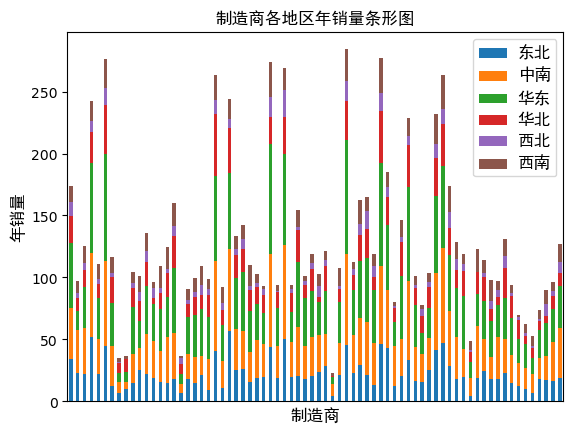

In [5]:
# 根据地区分组，并绘制条形图
fig, ax = plt.subplots()
df.groupby(['制造商', '地区'])['年销量'].sum().unstack().plot(kind='bar', stacked=True, ax=ax)

# 设置图表标题和标签
plt.xticks(fontproperties=font)
plt.xticks([])
plt.title('制造商各地区年销量条形图', fontproperties=font)
plt.xlabel('制造商', fontproperties=font)
plt.ylabel('年销量', fontproperties=font)
legend = ax.legend()
for i in range(0,6):
    label = legend.get_texts()[i]
    label.set_fontproperties(font)
# 显示图表
plt.show()

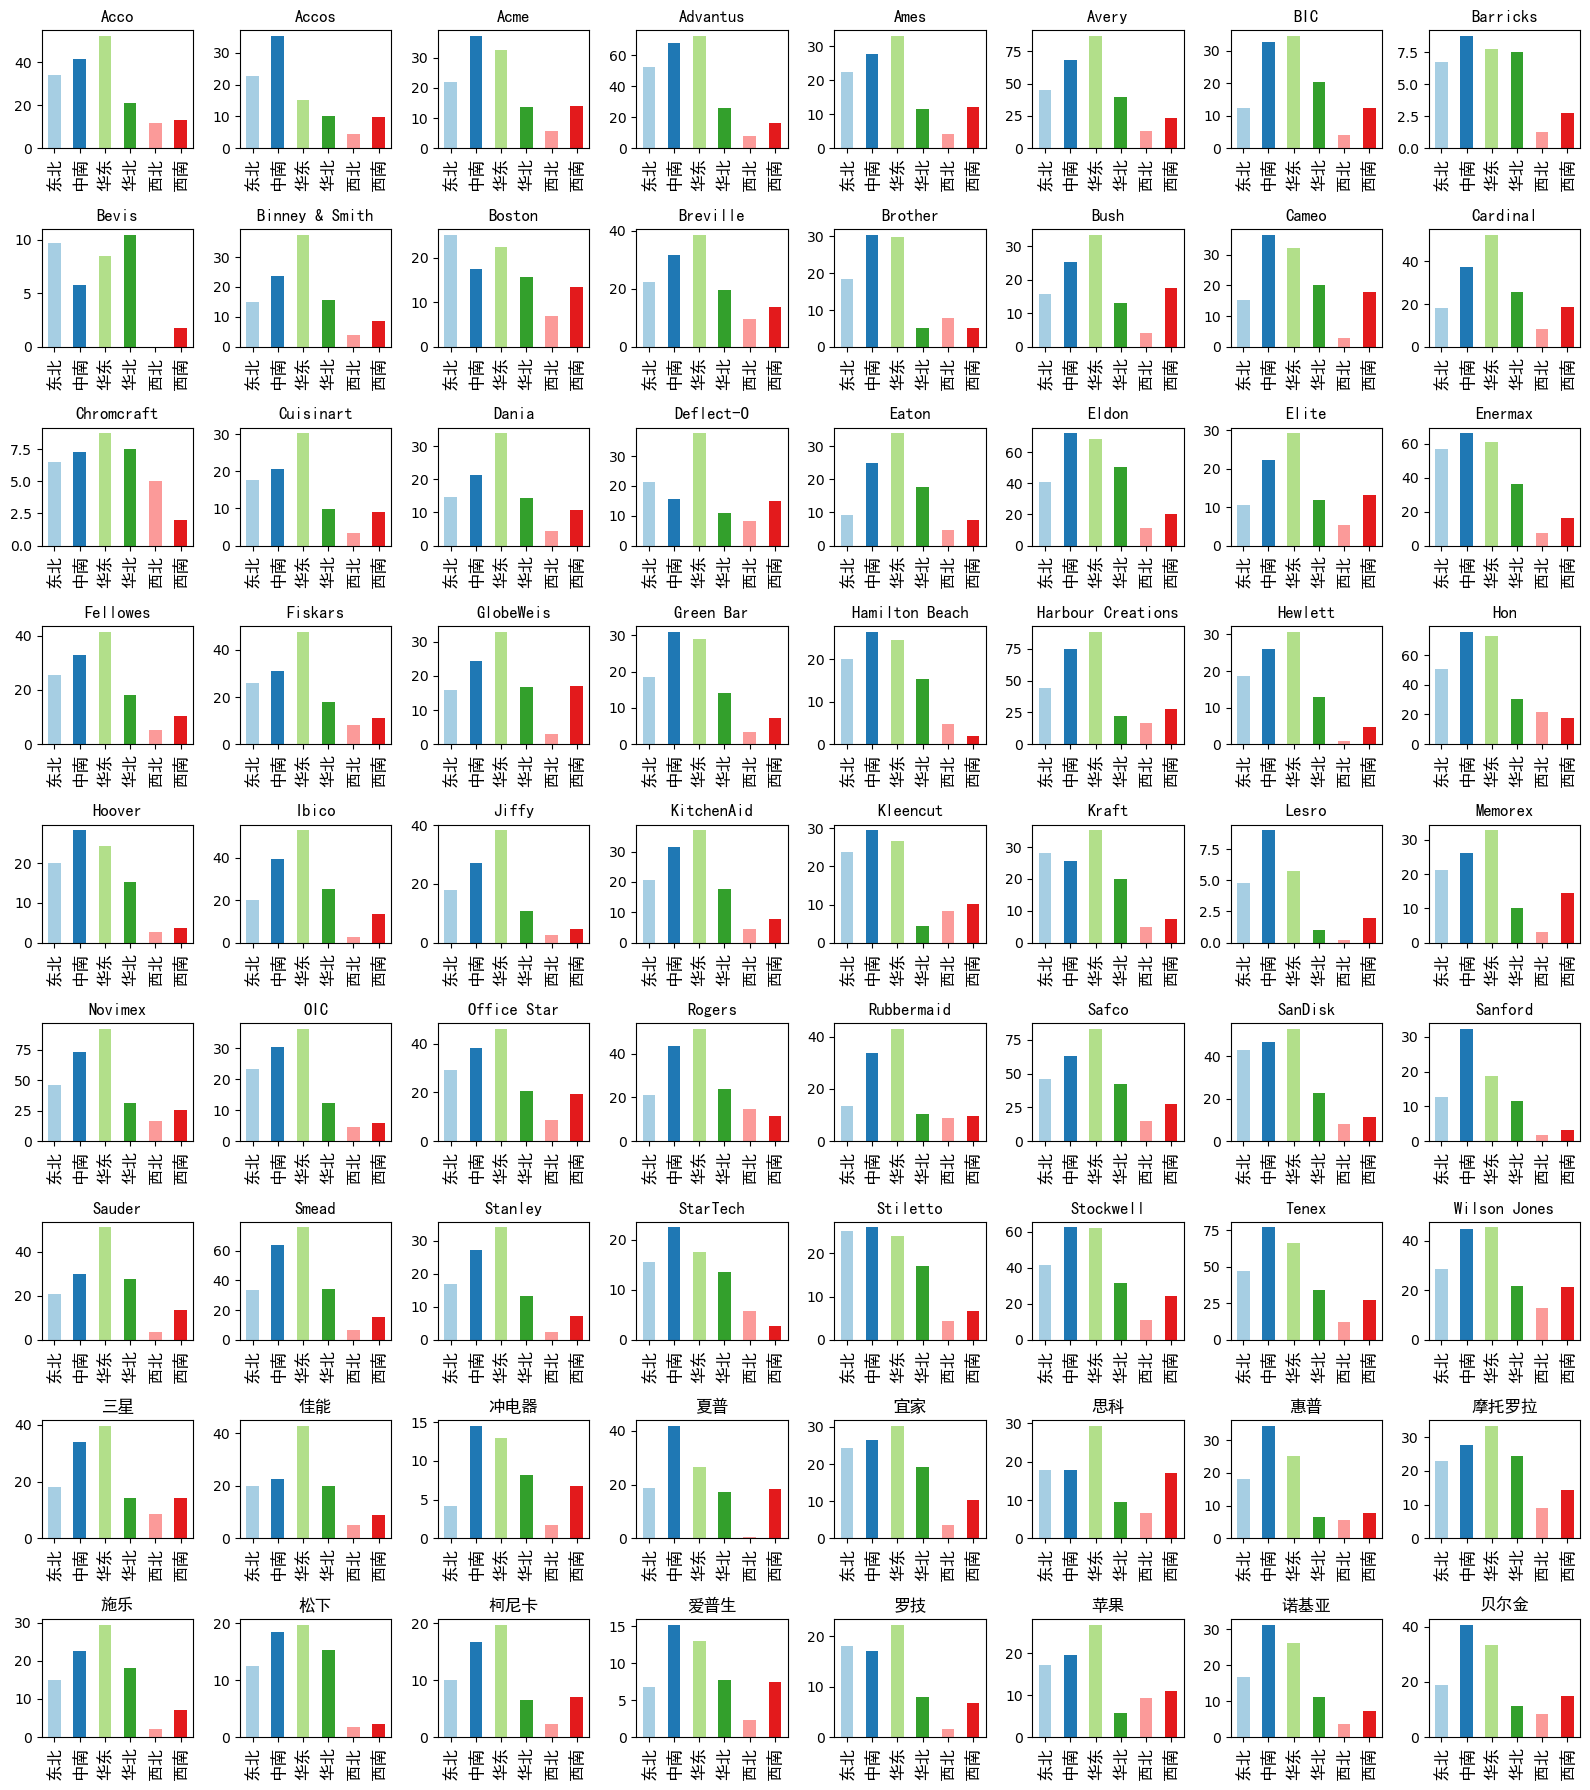

In [42]:
df2 = df.groupby(['制造商', '地区'])['年销量'].sum().unstack()
# 创建大图和子图
fig, axes = plt.subplots(nrows=9, ncols=8, figsize=(16, 18))

# 获取所有唯一的制造商
manufacturers = df['制造商'].unique()
areas = ['东北','中南','华东','华北','西北','西南']
colors = ['red', 'orange', 'green','blue', 'purple', 'pink']

# 遍历每个制造商
for i, manufacturer in enumerate(manufacturers):
    # 计算行和列索引
    row_index = i // 8
    col_index = i % 8

    # 在每个子图中绘制条形图
    ax = axes[row_index, col_index]
    df2.loc[manufacturer].plot(kind='bar', x='地区', y=manufacturer, ax=ax, color=plt.cm.Paired(range(len(areas))))

    # 隐藏xtick
    ax.set_xlabel('')

    # 设置标题
    ax.set_title(manufacturer, fontproperties=font)
    ax.set_xticklabels(areas, fontproperties=font)
    # print(ax.get_xticks())

# 调整布局
plt.tight_layout()
plt.show()

### 产品名称

In [55]:
print("共"+str(df['产品名称'].drop_duplicates().shape[0])+"种产品")

共102种产品


In [61]:
sales_list = df.groupby(['产品名称'])['年销量'].sum().tolist()
print(max(sales_list))
print(min(sales_list))

163.75
22.25


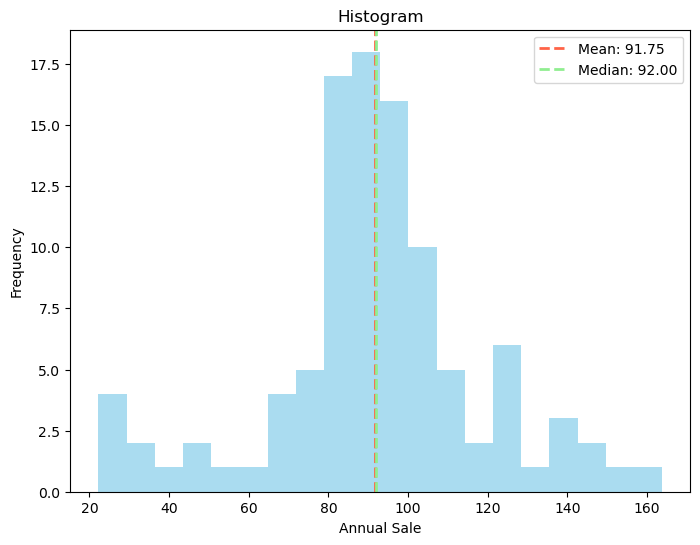

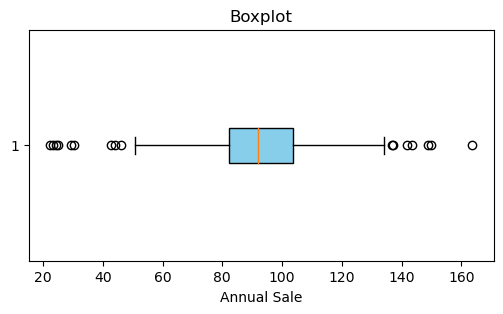

In [80]:
import numpy as np

# 计算统计信息
mean_value = np.mean(sales_list)
median_value = np.median(sales_list)

# 创建直方图
plt.figure(figsize=(8, 6))
plt.hist(sales_list, bins=20, color='#87CEEB', alpha=0.7)
plt.axvline(mean_value, color='#FF6347', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='#90EE90', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.xlabel('Annual Sale')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()

# 创建箱线图
plt.figure(figsize=(6, 3))
plt.boxplot(sales_list, vert=False, patch_artist=True, boxprops=dict(facecolor='#87CEEB'))  # 使用浅蓝色
plt.xlabel('Annual Sale')
plt.title('Boxplot')
plt.show()


<Figure size 2000x1200 with 0 Axes>

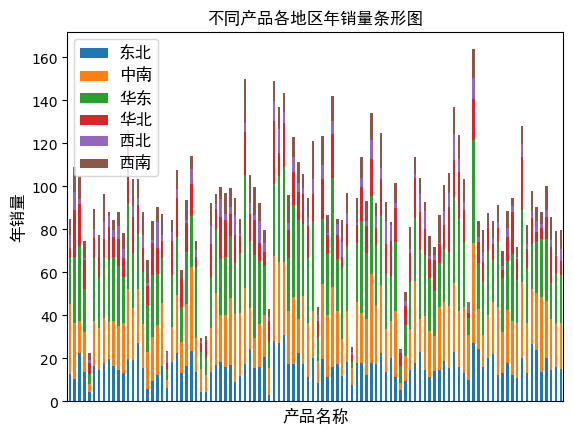

In [82]:
plt.figure(figsize=(20, 12))

# 根据地区分组，并绘制条形图
fig, ax = plt.subplots()
df.groupby(['产品名称', '地区'])['年销量'].sum().unstack().plot(kind='bar', stacked=True, ax=ax)

# 设置图表标题和标签
plt.xticks(fontproperties=font)
plt.xticks([])
plt.title('不同产品各地区年销量条形图', fontproperties=font)
plt.xlabel('产品名称', fontproperties=font)
plt.ylabel('年销量', fontproperties=font)
legend = ax.legend()
for i in range(0,6):
    label = legend.get_texts()[i]
    label.set_fontproperties(font)
# 显示图表
plt.show()

In [108]:
df2 = df.groupby(['产品名称', '地区'])['年销量'].sum().reset_index()
pivot_df = df2.pivot(index='产品名称', columns='地区', values='年销量')
print(pivot_df)

地区         东北     中南     华东     华北    西北     西南
产品名称                                           
个人复印机   12.75  32.50  21.50   4.50  6.00   7.50
书库      10.50  25.75  30.75  22.00  8.50  11.50
书架      22.50  15.00  34.75  19.50  2.50  10.75
令       13.50  18.75  19.75  13.75  0.75   8.00
会议桌      4.50   3.50   4.50   5.25  1.25   3.25
...       ...    ...    ...    ...   ...    ...
闪存驱动器   13.50  35.00  26.75   5.50  1.75   5.50
闹钟      20.25  26.25  28.75  10.50  3.25  11.00
音频基座    14.75  23.50  16.75  16.75  3.25  10.50
马尼拉纸信封  16.00  19.75  23.75   8.00  0.50  11.25
鼠标      15.00  21.25  22.25   6.75  5.75   8.75

[102 rows x 6 columns]


In [123]:
from pyecharts import options as opts
from pyecharts.charts import Page, Parallel

data = pivot_df.values.tolist()
c = (
    Parallel()
    .add_schema(
    [
        opts.ParallelAxisOpts(dim=0, name="东北"),
        opts.ParallelAxisOpts(dim=1, name="中南"),
        opts.ParallelAxisOpts(dim=2, name="华东"),
        opts.ParallelAxisOpts(dim=3, name="华北"),
        opts.ParallelAxisOpts(dim=4, name="西北"),
        opts.ParallelAxisOpts(dim=5, name="西南"),
    ])
    .add("parallel",data)
    .set_global_opts(title_opts=opts.TitleOpts(title="产品平行坐标分布图"))
)
c.render("产品平行坐标分布图.html")

'/Users/helinwang/Desktop/机器学习论文题目和要求/Untitled Folder/产品平行坐标分布图.html'

### 类别

In [148]:
print("共"+str(df['类别'].drop_duplicates().shape[0])+"种类别")
print("共"+str(df['子类别'].drop_duplicates().shape[0])+"种子类别")

共3种类别
共17种子类别


In [144]:
df2 = df.groupby(['类别', '地区'])['年销量'].sum().reset_index()
pivot_df = df2.pivot(index='类别', columns='地区', values='年销量')
print(pivot_df)

地区        东北       中南       华东      华北      西北      西南
类别                                                    
办公用品  917.25  1399.75  1579.00  742.25  244.50  464.50
家具    369.75   508.75   626.25  283.25  117.00  203.50
技术    346.00   521.75   538.00  229.00   86.75  181.75


[5347.25, 2108.5, 1903.25]


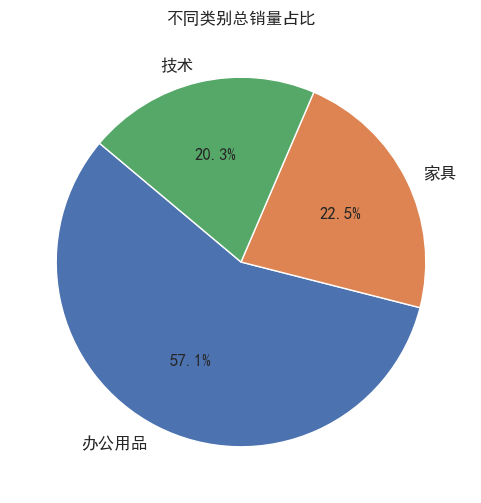

In [171]:
data = df.groupby(['类别'])['年销量'].sum().reset_index().values
labels = ['办公用品', '家具', '技术']
count = df.groupby(['类别'])['年销量'].sum().reset_index().iloc[:, 1].tolist()
print(count)

# 绘制饼状图
plt.figure(figsize=(6, 6))

wedges, texts, autotexts = plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=140, 
                                   textprops=dict(fontproperties=font))

plt.title("不同类别总销量占比", fontproperties=font)
plt.show()

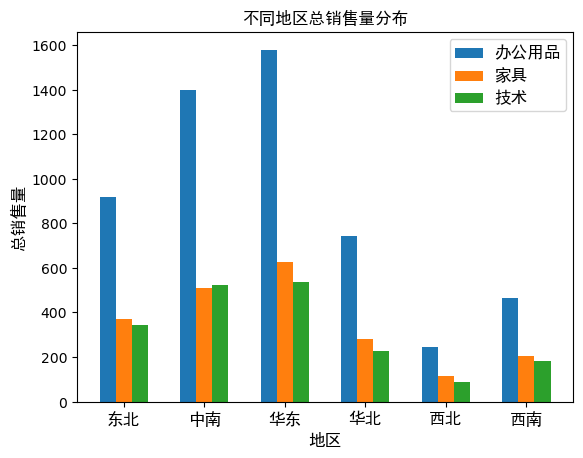

In [141]:
regions = ['东北', '中南', '华东', '华北', '西北', '西南']
categories = ['办公用品', '家具', '技术']
values = pivot_df.values.tolist()
# 绘制直方图
bar_width = 0.2
bar_positions = np.arange(len(regions))

for i, category in enumerate(categories):
    plt.bar(bar_positions + i * bar_width, values[i], width=bar_width, label=category)

plt.xlabel('地区', fontproperties=font)
plt.ylabel('总销售量', fontproperties=font)
plt.title('不同地区总销售量分布', fontproperties=font)
plt.xticks(bar_positions + bar_width, regions, fontproperties=font)

legend = plt.legend()
for i in range(0,3):
    label = legend.get_texts()[i]
    label.set_fontproperties(font)
plt.show()

In [154]:
df2 = df.groupby(['子类别', '地区'])['年销量'].sum().reset_index()
pivot_df = df2.pivot(index='地区', columns='子类别', values='年销量')
print(pivot_df)

子类别      书架      信封      器具     复印机     收纳具      标签     桌子      椅子      用具  \
地区                                                                           
东北    96.00   99.75  100.75   93.75  114.25   83.50  32.50  137.75  103.50   
中南   125.75  141.50  138.50  155.00  191.25  153.00  36.00  199.00  148.00   
华东   191.00  171.75  154.75  155.00  219.50  166.50  37.00  234.50  163.75   
华北    94.25   79.00   77.50   61.75  115.00   50.75  29.50   90.00   69.50   
西北    25.50   18.00   24.75   19.75   35.75   26.50  10.25   46.00   35.25   
西南    63.25   59.00   36.25   44.75   58.25   46.25   9.50   78.75   52.00   

子类别      用品      电话     系固件      纸张      美术     装订机     设备      配件  
地区                                                                  
东北   107.25   93.00  110.50   90.00   82.00  129.25  49.00  110.25  
中南   146.25  130.00  166.75  126.25  133.25  203.00  87.50  149.25  
华东   160.50  155.00  149.50  149.75  147.25  259.50  83.00  145.00  
华北    65.00   64.75   68.25   

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20070 (\N{CJK UNIFIED IDEOGRAPH-4E66}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26550 (\N{CJK UNIFIED IDEOGRAPH-67B6}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 23553 (\N{CJK UNIFIED IDEOGRAPH-5C01}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 22120 (\N{CJK UNIFIED IDEOGRAPH-5668}) missing from current font.
  fig.canvas.draw()
/User

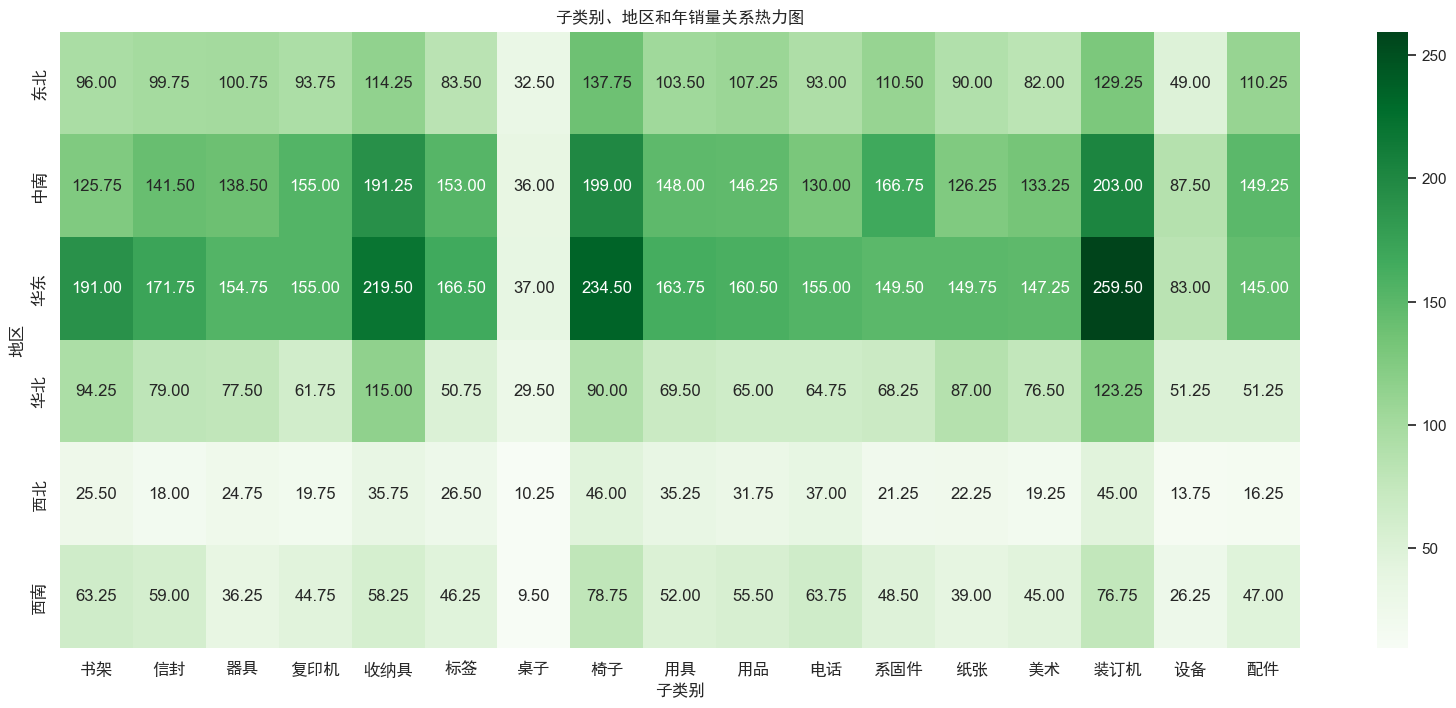

In [159]:
# 设置图形样式
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# 创建热力图
sns.heatmap(pivot_df,cmap='Greens', annot=True, fmt=".2f")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font)

# 设置图形标题和轴标签
plt.title('子类别、地区和年销量关系热力图', fontproperties=font)
plt.xlabel('子类别', fontproperties=font)
plt.ylabel('地区', fontproperties=font)

# 显示图形
plt.show()

### 地区

In [172]:
province_mapping = {
    '浙江': '浙江省',
    '四川': '四川省',
    '江苏': '江苏省',
    '广东': '广东省',
    '江西': '江西省',
    '陕西': '陕西省',
    '黑龙江': '黑龙江省',
    '山东': '山东省',
    '上海': '上海市',
    '河北': '河北省',
    '福建': '福建省',
    '安徽': '安徽省',
    '甘肃': '甘肃省',
    '吉林': '吉林省',
    '辽宁': '辽宁省',
    '湖北': '湖北省',
    '河南': '河南省',
    '湖南': '湖南省',
    '北京': '北京市',
    '重庆': '重庆市',
    '青海': '青海省',
    '广西': '广西壮族自治区',
    '天津': '天津市',
    '云南': '云南省',
    '贵州': '贵州省',
    '山西': '山西省',
    '内蒙古': '内蒙古自治区',
    '宁夏': '宁夏回族自治区',
    '海南': '海南省',
    '新疆': '新疆维吾尔自治区',
    '西藏': '西藏自治区'
}

In [178]:
province = {}
for i in range(df.shape[0]):
    if province_mapping[df['省/自治区'][i]] not in province:
        province[province_mapping[df['省/自治区'][i]]] = df['年销量'][i]
    else:
        province[province_mapping[df['省/自治区'][i]]] += df['年销量'][i]
    
data = list(province.items())

In [179]:
print(data)

[('辽宁省', 645.75), ('黑龙江省', 646.75), ('广东省', 775.0), ('湖北省', 538.25), ('湖南省', 414.5), ('上海市', 270.0), ('山东省', 849.75), ('江苏省', 563.0), ('浙江省', 395.75), ('福建省', 240.5), ('内蒙古自治区', 208.25), ('北京市', 239.0), ('河北省', 377.75), ('云南省', 203.75), ('四川省', 359.5), ('重庆市', 209.0), ('广西壮族自治区', 199.25), ('河南省', 440.75), ('山西省', 155.5), ('新疆维吾尔自治区', 34.75), ('陕西省', 227.25), ('贵州省', 69.0), ('天津市', 274.0), ('吉林省', 340.5), ('安徽省', 297.75), ('江西省', 126.5), ('宁夏回族自治区', 31.5), ('甘肃省', 134.5), ('海南省', 62.5), ('青海省', 20.25), ('西藏自治区', 8.5)]


In [180]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

In [184]:
productsMap = Map()
productsMap.set_global_opts (visualmap_opts = opts.VisualMapOpts (max_ = 1000))
productsMap.add (
    "商品年销量分布图",#图例名称
    data, #传入的地图数据
    maptype = "china",
    is_map_symbol_show = False
).set_series_opts(label_opts = opts.LabelOpts(is_show = False))
productsMap.render('annualSalesMap.html')

'/Users/helinwang/Desktop/机器学习论文题目和要求/Untitled Folder/annualSalesMap.html'

### 单价

In [188]:
import palettable

In [186]:
df2 = df.groupby(['单价'])['年销量'].sum().reset_index()
print(df2)

              单价    年销量
0      21.523938  30.75
1      21.974713  34.25
2      26.294440  34.25
3      27.312500  11.00
4      30.152484  19.25
..           ...    ...
499  4011.152778   2.75
500  4071.449074   4.50
501  4237.215278   3.75
502  4301.314286   4.75
503  4314.732828   6.50

[504 rows x 2 columns]


/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  f.tight_layout()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  f.tight_layout()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  f.tight_layout()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  f.tight_layout()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  f.

<Figure size 800x800 with 0 Axes>

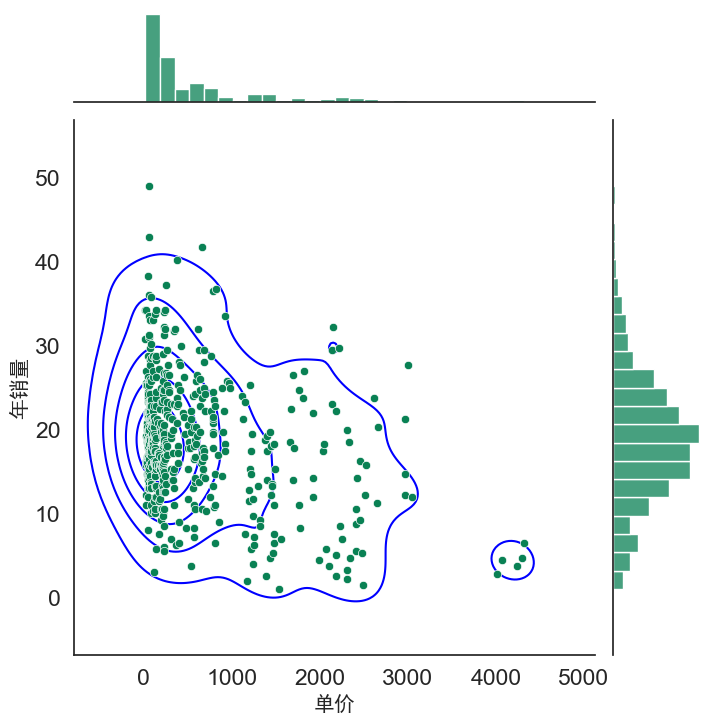

In [198]:
plt.figure(figsize=(8, 8))
sns.set(style="white",font_scale=1.5)#设置主题，文本大小
g = sns.jointplot(x='单价', y='年销量', data=df2,#输入两个绘图变量
                 color='#098154',#修改颜色
                 )
g.set_axis_labels('单价', '年销量', font=FontProperties(fname=font_path, size=15))
g.fig.set_size_inches(8,8)#设置图尺寸
g.plot_joint(sns.kdeplot, zorder=0, n_levels=6,color='blue')